In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv(r"/content/drive/My Drive/Colab Notebooks/ppr/D5-Amelie/S1/Office_Amelie-S1.csv",index_col='timestamp')

In [4]:
train_data = df.iloc[:1440]
test_data = df.iloc[1440:]

In [5]:
def load_data(data, seq_len):
    X = []
    y = []
    #print(len(data))
    for i in range(seq_len, len(data)):
        X.append(data.iloc[i-seq_len : i, 0])
        y.append(data.iloc[i, 0])
        #print(y)
   
    
    return [X, y]

In [6]:
# Sequence of training data
seq_len = 24 #choose sequence length

X1, y1= load_data(train_data, seq_len)

In [7]:
#Sequence of testing data
seq_len = 24 #choose sequence length

X2, y2= load_data(test_data, seq_len)

In [8]:
X_train = X1      
y_train = y1
X_test = X2             
y_test = y2

In [9]:
# convert training and testing data to numpy array
X_train = np.array(X_train)
y_train = np.array(y_train)
  
X_test = np.array(X_test)
y_test = np.array(y_test)

# reshape data to input into 3 dimension
X_train = np.reshape(X_train, (X_train.shape[0], seq_len, 1))
X_test = np.reshape(X_test, (X_test.shape[0], seq_len, 1))

In [10]:
print('X_train.shape = ',X_train.shape)
print('y_train.shape = ',y_train.shape)
print('X_test.shape = ',X_test.shape)
print('y_test.shape = ',y_test.shape)

X_train.shape =  (1416, 24, 1)
y_train.shape =  (1416,)
X_test.shape =  (696, 24, 1)
y_test.shape =  (696,)


In [11]:
import tensorflow as tf
import sklearn.preprocessing
from keras.layers import Dense,Dropout,LSTM,Bidirectional
from keras.models import Sequential

In [12]:
# define model
model = Sequential()
model.add(Bidirectional(LSTM(24, activation='tanh', return_sequences=False), input_shape=(24,1)))
#model.add(Bidirectional(LSTM(24, activation='tanh')))
#model.add(Dropout(0.5))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 48)               4992      
 l)                                                              
                                                                 
 dense (Dense)               (None, 1)                 49        
                                                                 
Total params: 5,041
Trainable params: 5,041
Non-trainable params: 0
_________________________________________________________________


In [30]:
opt=tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt,loss="MSE")

In [31]:
history= model.fit(X_train, y_train, epochs=300, batch_size=128)

Epoch 1/300
12/12 [==============================] - 5s 22ms/step - loss: 6.8844
Epoch 2/300
12/12 [==============================] - 0s 20ms/step - loss: 6.0033
Epoch 3/300
12/12 [==============================] - 0s 19ms/step - loss: 6.2750
Epoch 4/300
12/12 [==============================] - 0s 21ms/step - loss: 5.5439
Epoch 5/300
12/12 [==============================] - 0s 21ms/step - loss: 5.6394
Epoch 6/300
12/12 [==============================] - 0s 20ms/step - loss: 5.5819
Epoch 7/300
12/12 [==============================] - 0s 19ms/step - loss: 5.8892
Epoch 8/300
12/12 [==============================] - 0s 20ms/step - loss: 5.6099
Epoch 9/300
12/12 [==============================] - 0s 25ms/step - loss: 5.4698
Epoch 10/300
12/12 [==============================] - 0s 20ms/step - loss: 5.4293
Epoch 11/300
12/12 [==============================] - 0s 19ms/step - loss: 5.5768
Epoch 12/300
12/12 [==============================] - 0s 21ms/step - loss: 5.5562
Epoch 13/300
12/12 [=====

In [35]:
train_prediction=model.predict(X_train)
test_prediction=model.predict(X_test)

In [36]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt

In [37]:
rmse_train = sqrt(mean_squared_error(y_train, train_prediction))
rmse_test = sqrt(mean_squared_error(y_test, test_prediction))
mae_train=mean_absolute_error(y_train, train_prediction)
mae_test=mean_absolute_error(y_test, test_prediction)
mape_train = mean_absolute_percentage_error(y_train, train_prediction)
mape_test = mean_absolute_percentage_error(y_test, test_prediction)

print('RMSE for BiLSTM Model for training is:',rmse_train)
print('RMSE for BiLSTM Model for testing is:',rmse_test)
print('MAE for BiLSTM Model for training is:',mae_train)
print('MAE for BiLSTM Model for testing is:',mae_test)
print('MAPE for BiLSTM Model for training is:',mape_train)
print('MAPE for BiLSTM Model for testing is:',mape_test)

RMSE for BiLSTM Model for training is: 2.158663727459767
RMSE for BiLSTM Model for testing is: 5.268633854961847
MAE for BiLSTM Model for training is: 1.3364194148543191
MAE for BiLSTM Model for testing is: 3.0602402318757154
MAPE for BiLSTM Model for training is: 0.08639318463000085
MAPE for BiLSTM Model for testing is: 0.1667818073344458


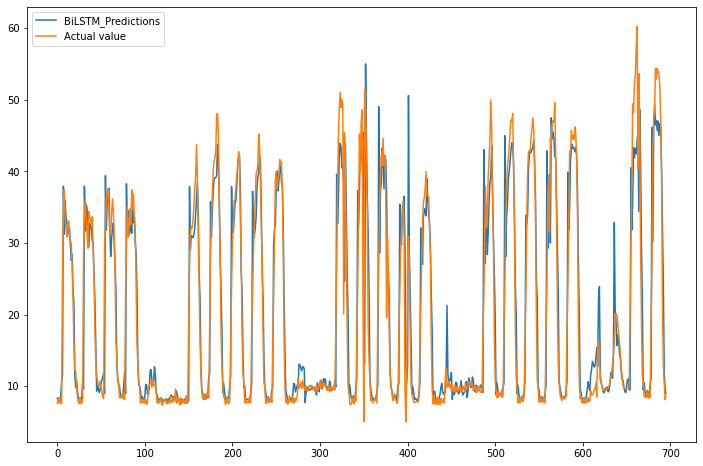

In [38]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(test_prediction,label='BiLSTM_Predictions')
plt.plot(y_test,label='Actual value')
plt.legend(loc="upper left")
plt.show()

In [39]:
y_test=y_test.reshape(-1,1)

y_test[0],test_prediction[0]

(array([7.63]), array([8.31325], dtype=float32))

In [40]:
d1=[]
for i in range(len(y_test)):
    d1.append(y_test[i]-test_prediction[i])
    
print(d1)

[array([-0.68324959]), array([0.25979431]), array([-0.76533043]), array([0.53292383]), array([-0.98709499]), array([-3.17398209]), array([14.49800835]), array([-3.23787766]), array([6.24189255]), array([-2.77222504]), array([-1.34864487]), array([-1.80115479]), array([1.59438637]), array([1.4245137]), array([-1.33218994]), array([0.01636566]), array([2.53272614]), array([-1.94010025]), array([-1.22191116]), array([-5.7092794]), array([0.50499386]), array([2.30301868]), array([-0.77199051]), array([-0.94154186]), array([-0.53149357]), array([-0.62266033]), array([0.50802965]), array([-0.46692101]), array([-1.04620571]), array([-2.30323154]), array([18.61832043]), array([-4.02510269]), array([4.50388306]), array([-1.75087296]), array([-3.4913353]), array([-3.2151799]), array([4.98781624]), array([0.75465103]), array([0.89003616]), array([0.52549667]), array([3.42973488]), array([-1.06254974]), array([-0.28061272]), array([-4.5310643]), array([-2.01370136]), array([1.97903469]), array([0.

In [41]:
d1.sort()
# Range of error value
max(d1),min(d1)

(array([38.33725048]), array([-23.36974258]))

In [42]:
max(d1)-min(d1)

array([61.70699306])

In [43]:
neg=[]
pos=[]
for i in range(len(d1)):
  if(d1[i]<0):
    neg.append(d1[i])
  if(d1[i]>0):  
    pos.append(d1[i])

In [44]:
len(neg),len(pos)

(388, 308)